In [1]:
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv('../data/train.csv')
data_test = pd.read_csv('../data/test.csv')
df = data_train.append(data_test)

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
df.info()
print('合并后一共{0}条数据。'.format(str(df.shape[0])))
print(pd.isnull(df).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
合并后一共1309条数据。
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [6]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("bmh")
plt.rc('font', size=13)
cat_list = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for n,i in enumerate(cat_list):  
    Cabin_cat_num = df[i].value_counts().index.shape[0]
    print('{0}. {1}特征的类型数量是: {2}'.format(n+1,i,Cabin_cat_num))

1. Pclass特征的类型数量是: 3
2. Name特征的类型数量是: 1307
3. Sex特征的类型数量是: 2
4. SibSp特征的类型数量是: 7
5. Embarked特征的类型数量是: 3
6. Parch特征的类型数量是: 8
7. Ticket特征的类型数量是: 929
8. Cabin特征的类型数量是: 186


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/sjtc/anaconda3

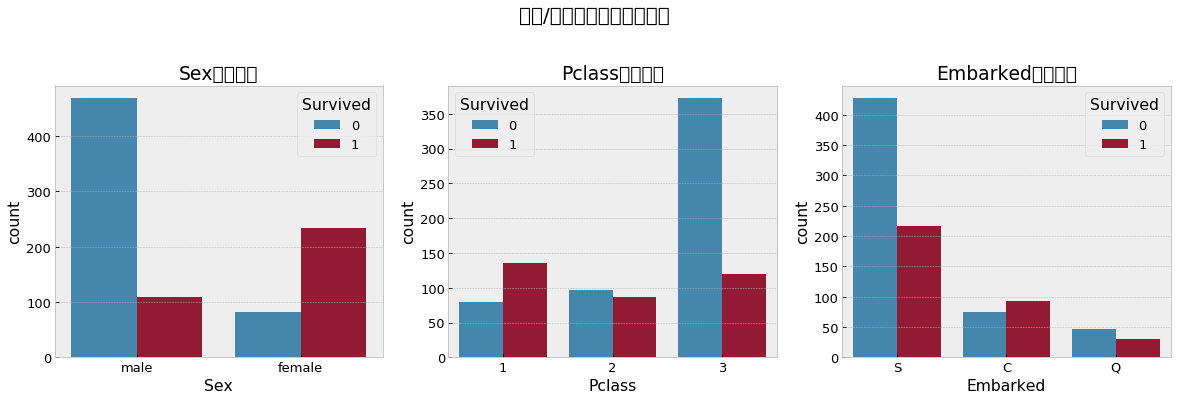

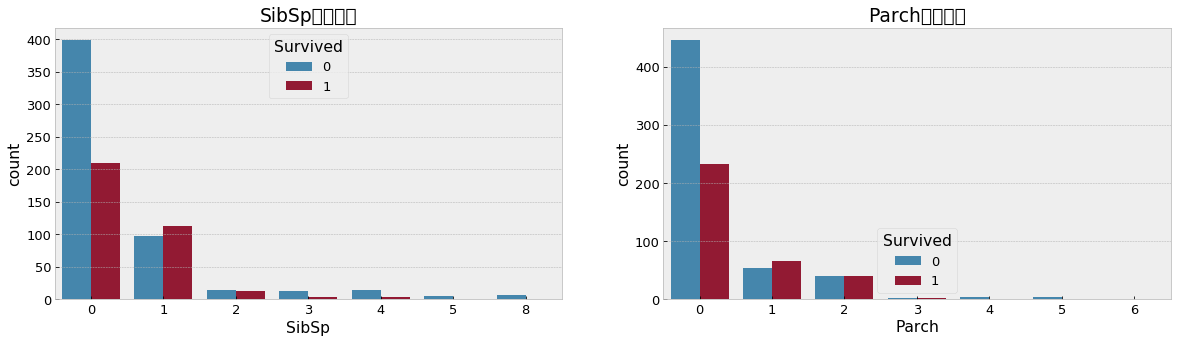

In [10]:
f, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Sex特征分析')
ax2.set_title('Pclass特征分析')
ax3.set_title('Embarked特征分析')
f.suptitle('定类/定序数据类型特征分析',size=20,y=1.1)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp特征分析')
ax2.set_title('Parch特征分析')

plt.show()

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


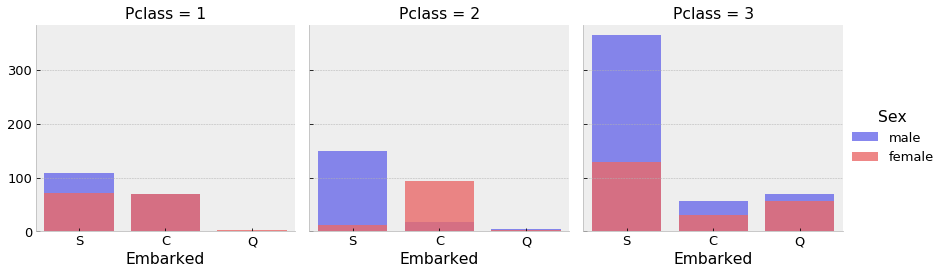

In [11]:
# 在不同社会等级下，男性和女性在不同登陆港口下的数量对比
grid = sns.FacetGrid(df, col='Pclass', hue='Sex', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

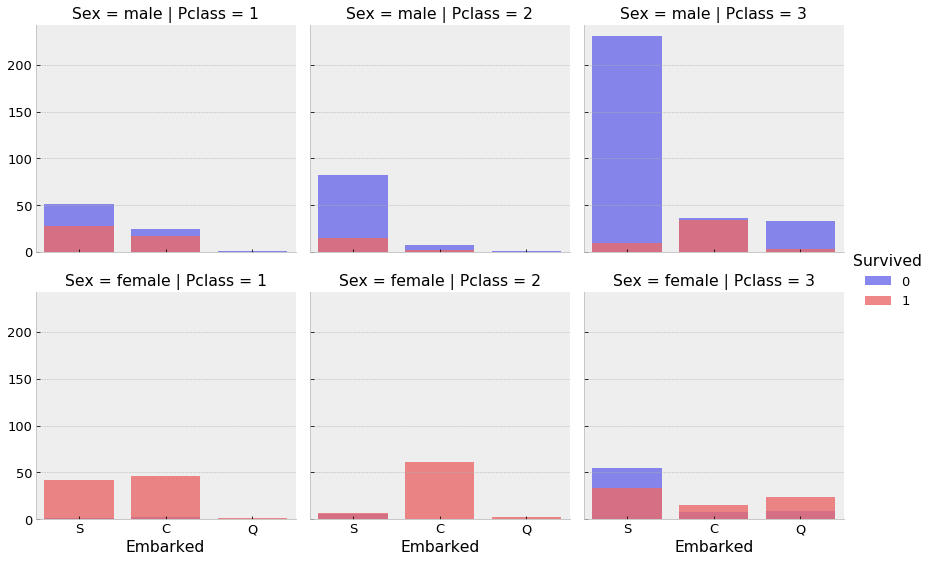

In [12]:
# 在不同社会等级下，男性和女性在不同登陆港口下的数量对比
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Frequency')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0, flags=flags)


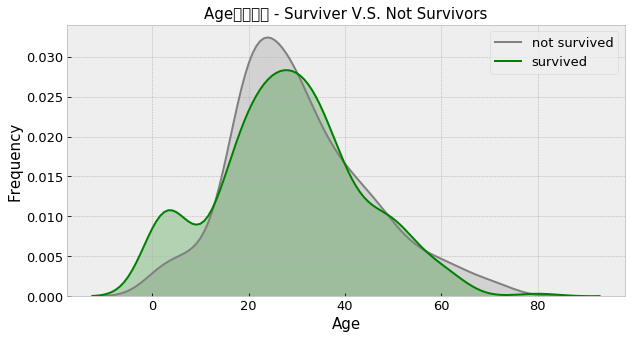

In [13]:
# kde分布
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data_train.loc[(data_train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
sns.kdeplot(data_train.loc[(data_train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age特征分布 - Surviver V.S. Not Survivors', fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/User

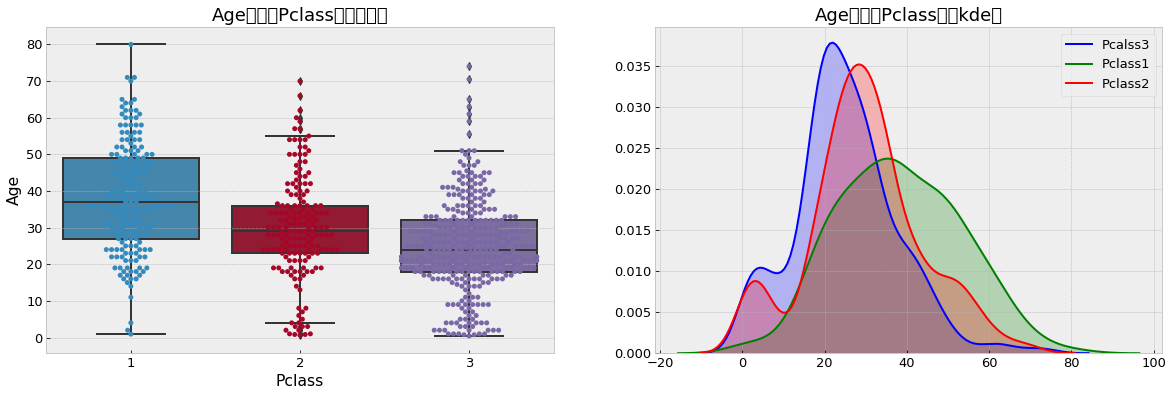

In [14]:
# 箱型图特征分析
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Age'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Age'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Age'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Age特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Age特征在Pclass下的kde图", fontsize = 18)
fig.show()

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


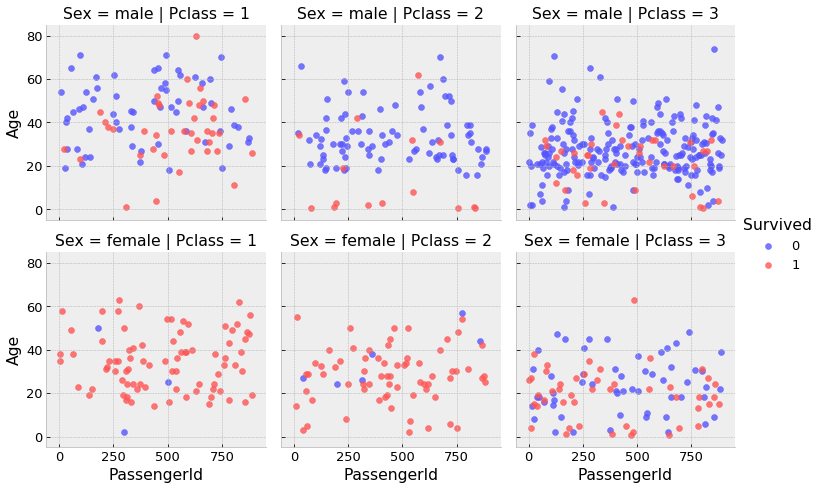

In [15]:
# Sex，Pclass分类条件下的 Age年龄对Survived的散点图
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()

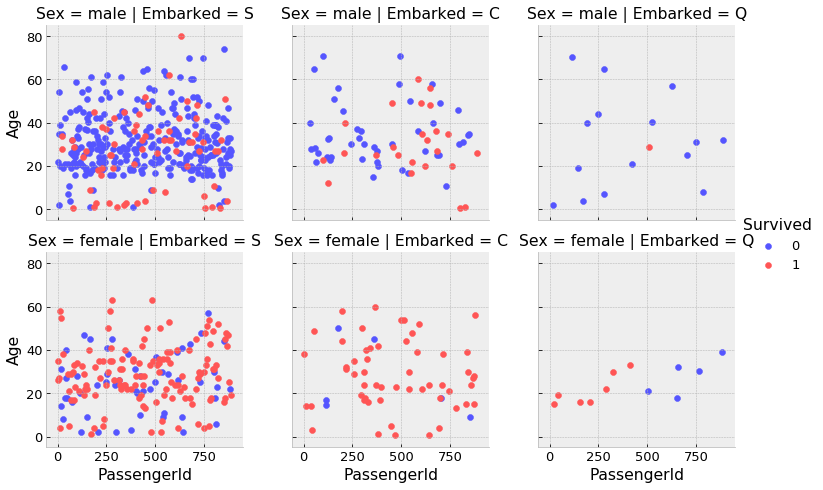

In [16]:
# Sex，Embarked分类条件下的 Age年龄对Survived的散点图
grid = sns.FacetGrid(data_train, col = "Embarked", row = "Sex", hue = "Survived", palette = 'seismic', size=3.5)
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid